<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/CDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratsharma7/student-quiz-marks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-quiz-marks-dataset


In [54]:
import pandas as pd
marks=pd.read_csv(path + "/marks_final.csv")
marks['Out of 100'] = (marks['Out of 30'] / 30) * 100
marks = marks.sort_values(by='Out of 100', ascending=True)

In [55]:
#Calculate CDF
value_counts = marks['Out of 100'].value_counts()
sorted_value_counts = value_counts.sort_index(ascending=True)
cumulative_counts = sorted_value_counts.cumsum()

In [56]:
import numpy as np
plot_data = pd.Series(index=np.arange(0, 101, 5), dtype=float)

for i in plot_data.index:
  # Find the last cumulative count whose index is less than or equal to i
  relevant_counts = cumulative_counts[cumulative_counts.index <= i]
  if not relevant_counts.empty:
    plot_data[i] = relevant_counts.iloc[-1]
  else:
    plot_data[i] = 0

Plot CDF and PDF

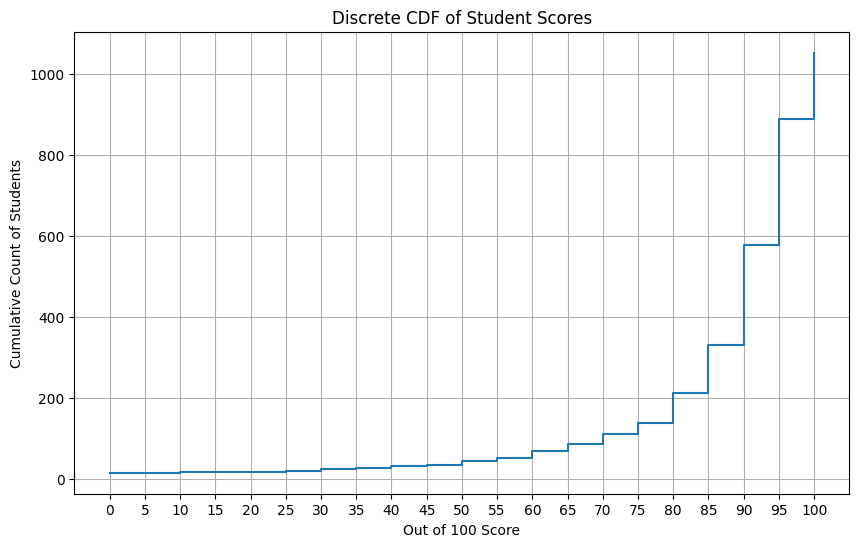

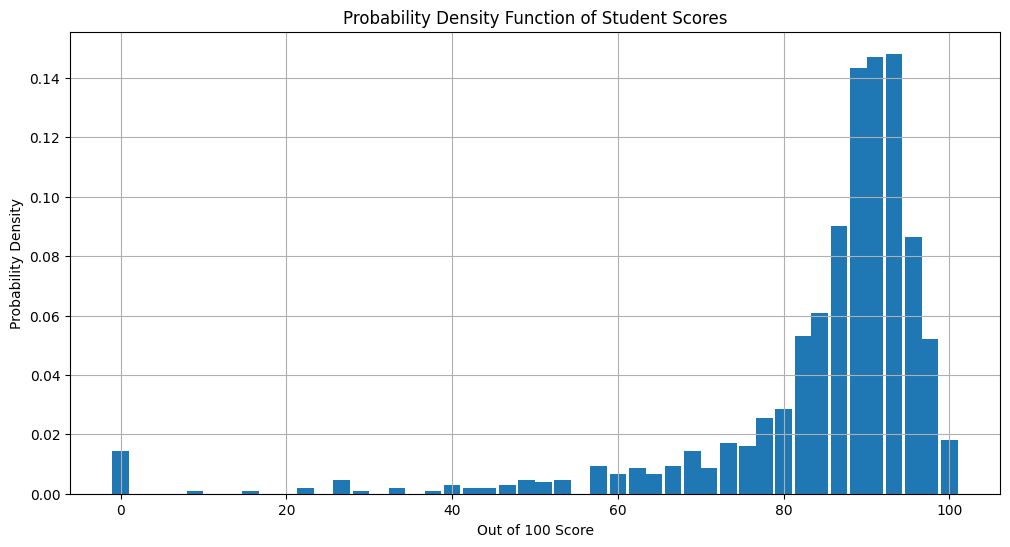

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(plot_data.index, plot_data.values, drawstyle='steps-post')
plt.xlabel('Out of 100 Score')
plt.ylabel('Cumulative Count of Students')
plt.title('Discrete CDF of Student Scores')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.show()
total_students = marks.shape[0]
cumulative_probability = cumulative_counts / total_students
pdf_values = cumulative_probability.diff().fillna(cumulative_probability.iloc[0])
pdf = pd.Series(pdf_values.values, index=pdf_values.index)
plt.figure(figsize=(12, 6))
plt.bar(pdf.index, pdf.values, width=2, align='center')
plt.xlabel('Out of 100 Score')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Student Scores')
plt.grid(True)
plt.show()

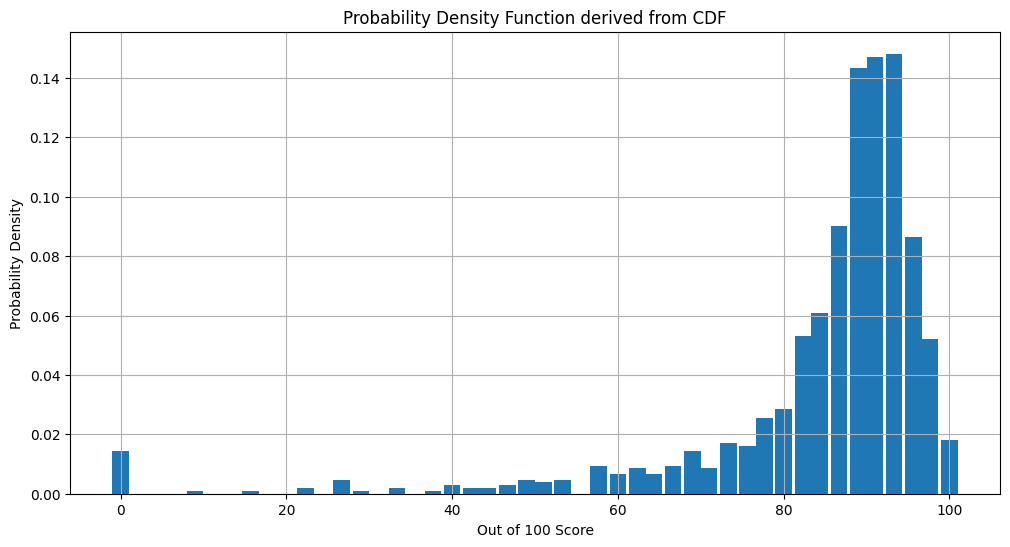

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(pdf_from_cdf.index, pdf_from_cdf.values, width=2, align='center')
plt.xlabel('Out of 100 Score')
plt.ylabel('Probability Density')
plt.title('Probability Density Function derived from CDF')
plt.grid(True)
plt.show()

In [61]:
pdf_from_cdf = cumulative_probability.diff().fillna(cumulative_probability.iloc[0])
display(pdf_from_cdf.head())

,count
Out of 100,
0.000000,0.014245
9.000000,0.000950
15.666667,0.000950
22.333333,0.001899
26.666667,0.004748


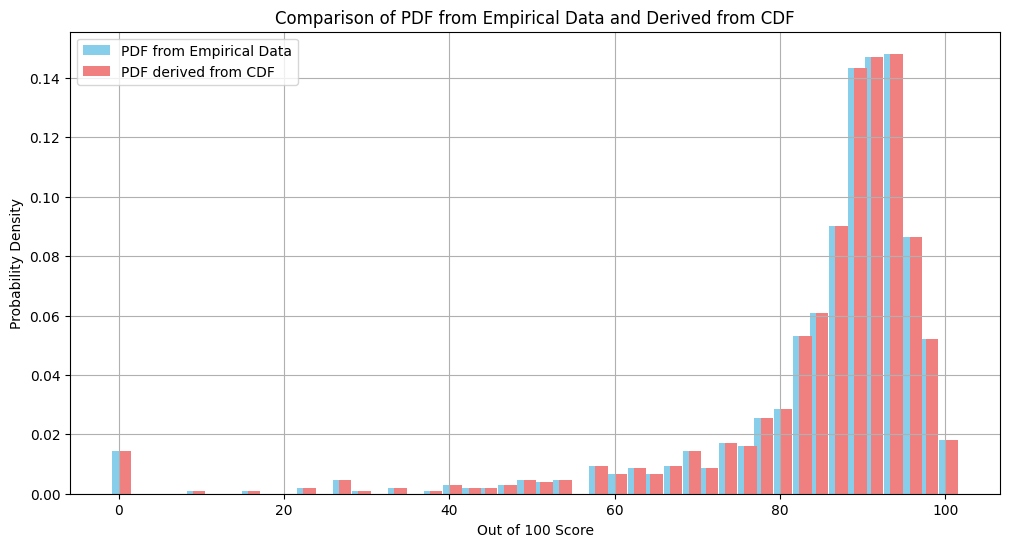

In [60]:
plt.figure(figsize=(12, 6))

# Plot PDF from empirical data
plt.bar(pdf.index, pdf.values, width=1.5, align='center', color='skyblue', label='PDF from Empirical Data')

# Plot PDF from CDF
plt.bar(pdf_from_cdf.index + 0.75, pdf_from_cdf.values, width=1.5, align='center', color='lightcoral', label='PDF derived from CDF')


plt.xlabel('Out of 100 Score')
plt.ylabel('Probability Density')
plt.title('Comparison of PDF from Empirical Data and Derived from CDF')
plt.grid(True)
plt.legend()
plt.show()

CDF is pretty usefull in inquiring about how many students got less then or equal to 90 marks

OR

What percentage of class performed les than 40, less than 90, less than 20

This can help us gauge the overall performance of the class and set some good standards for grades